# Heart Disease Prediction Using Python ML 

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r"E:\Jupyter Notebook\HealthAnalysisProject\heart.csv")
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### last five Rows Data

In [31]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


### Total Rows and Column

In [32]:
df.shape

(1025, 14)

### Show datatype 

In [33]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [34]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Check Duplicate Values

In [35]:
dp_val = df.duplicated().any()
print(dp_val)

True


### Remove Duplicate Values 

In [36]:
df = df.drop_duplicates()
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


This code checks and remove same roles in our data making sure each information appears only once

### know check the columns after remove duplicate values

In [37]:
df.shape

(302, 14)

### Exploring Relationships: Heatmaps With Python For Data Visualization 

In [38]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


<Axes: >

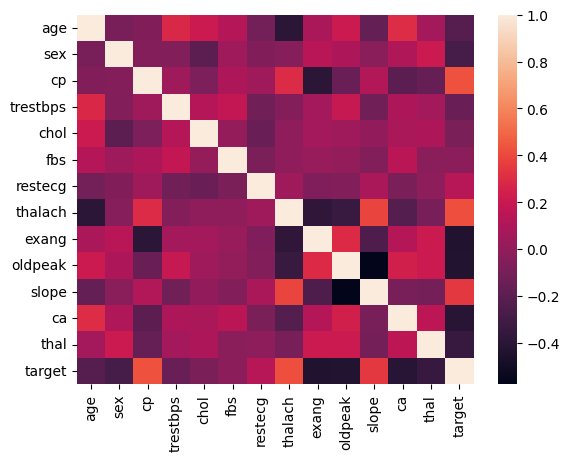

In [39]:
sns.heatmap(df.corr())

<Axes: title={'center': 'Visualize correlations with a heatmap '}>

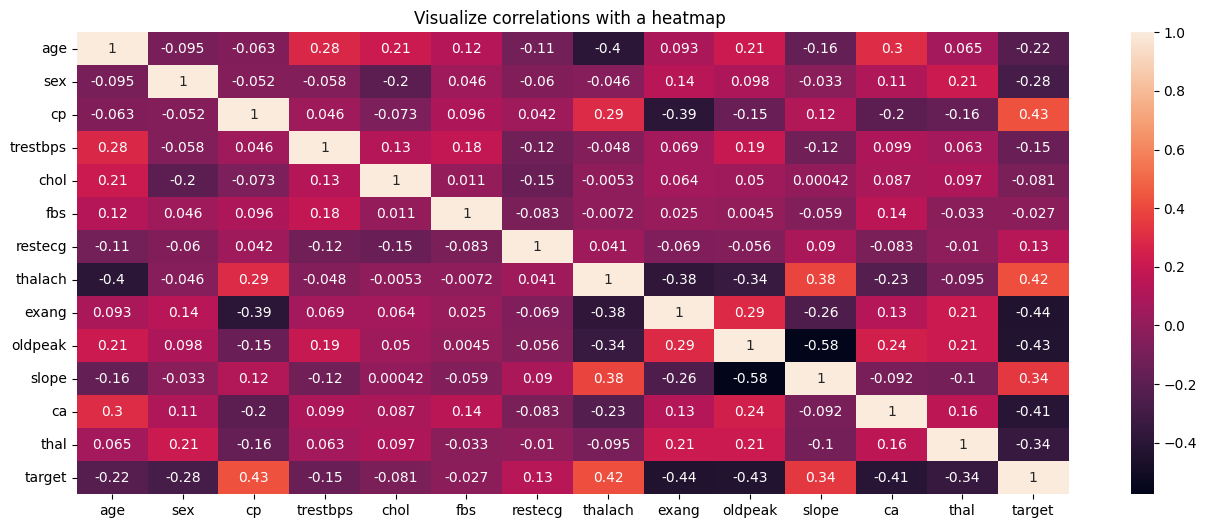

In [54]:
plt.figure(figsize=(16,6))
plt.title("Visualize correlations with a heatmap ")
sns.heatmap(df.corr(),annot=True)

###  Numbers Affected and Unaffected by Heart Problems

In [41]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

C:\Users\computer lab\AppData\Local\Temp\ipykernel_4724\685064159.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = 'target',data = df ,palette=['#2ca02c', '#8B0000'])


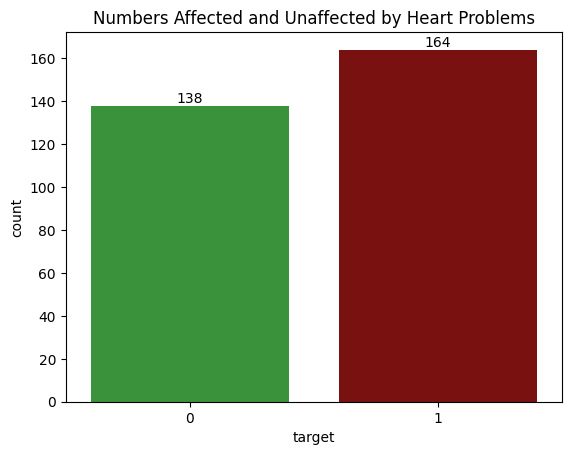

In [42]:

ax = sns.countplot(x = 'target',data = df ,palette=['#2ca02c', '#8B0000'])
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Numbers Affected and Unaffected by Heart Problems")
plt.show()

C:\Users\computer lab\AppData\Local\Temp\ipykernel_4724\3141897876.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = df ,x = 'sex',palette=['#d62799', '#1f77b4'])


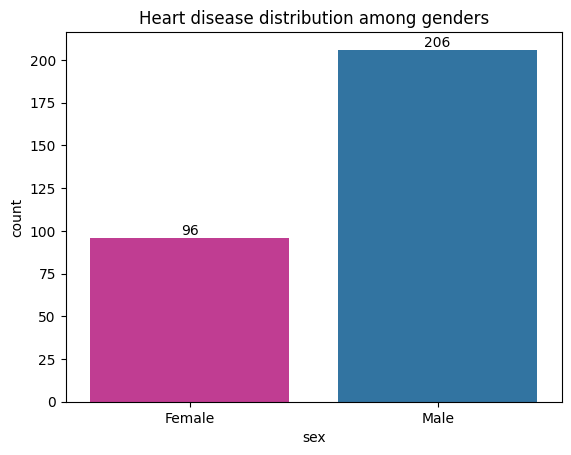

In [56]:
ax = sns.countplot(data = df ,x = 'sex',palette=['#d62799', '#1f77b4'])
plt.title("Heart disease distribution among genders")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.xticks([0,1],['Female','Male'])
plt.show()

Distribution of Heart Disease Among Males and Females

In [44]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

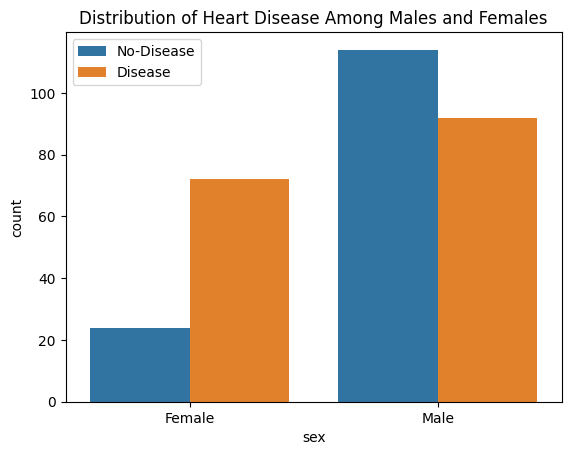

In [45]:
ax = sns.countplot(data = df ,x = 'sex',hue =df['target'])

plt.title("Distribution of Heart Disease Among Males and Females")
plt.xticks([0,1],['Female','Male'])
plt.legend(labels=['No-Disease','Disease'])
plt.show()

 This graph helps us see the distribution of heart disease among males and females

### Distribution of Ages in our Dataset

In [46]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

C:\Users\computer lab\AppData\Local\Temp\ipykernel_4724\2792066689.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'],bins =20)


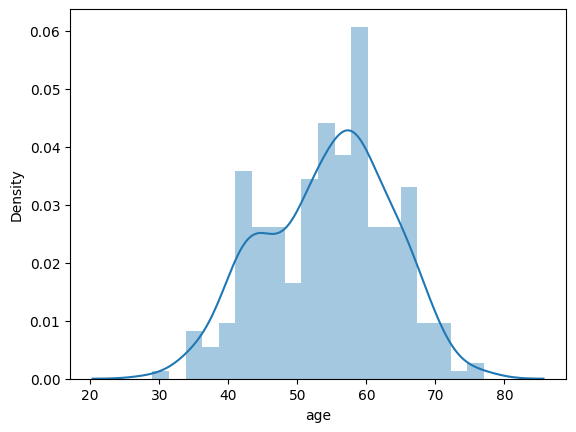

In [47]:
sns.distplot(df['age'],bins =20)
plt.show()

this chart gives us a visual sense of the age distribution,this P Curve Shows the major respondents of this lies from 50 to 60 age

### Chest Pain Types

C:\Users\computer lab\AppData\Local\Temp\ipykernel_4724\4099953975.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = df ,x = 'cp',palette=['#d62799', '#1f77b4','#2ca02c', '#8B0000'])


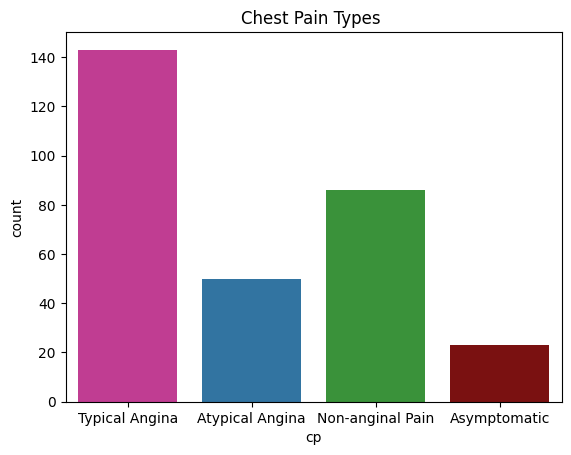

In [48]:
ax = sns.countplot(data = df ,x = 'cp',palette=['#d62799', '#1f77b4','#2ca02c', '#8B0000'])
plt.xticks([0,1,2,3],['Typical Angina','Atypical Angina','Non-anginal Pain','Asymptomatic'])
plt.title("Chest Pain Types ")
plt.show()

### Chest Pain Distribution by Heart Disease vs Non Heart Disease

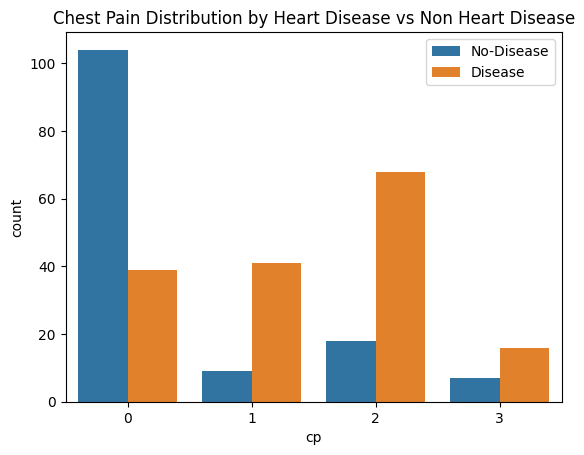

In [49]:
ax = sns.countplot(data = df ,x = 'cp',hue =df['target'])

plt.title("Chest Pain Distribution by Heart Disease vs Non Heart Disease")
plt.legend(labels=['No-Disease','Disease'])
plt.show()

### Resting Blood Pressure Distribution Overview

In [50]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

<Axes: >

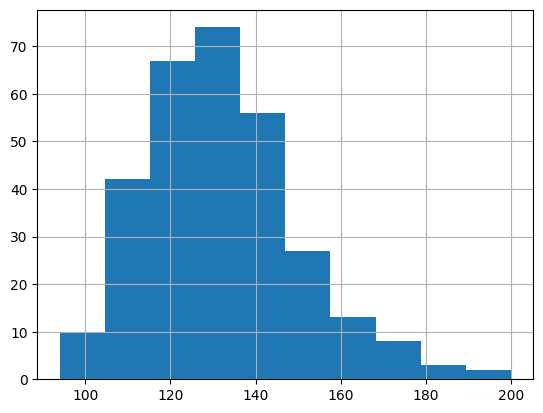

In [51]:
df['trestbps'].hist()

Normal Resting Blood Pressure is typically below 120/80 mmHg .Higher Values may indicate hypertension ,a risk factor for heart disease

### Serum Cholesterol(Chol) Data Distribution 

<Axes: >

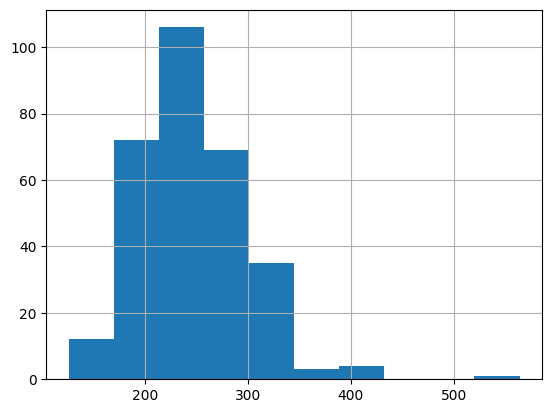

In [52]:
df['chol'].hist()

Desirable Total Cholesterol is generally below 200mg/dl